#  Principal Component Analysis

We will explore what is perhaps one of the most broadly used unsupervised algorithms, principal component analysis (PCA).

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, noise filtering, feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will explore a couple examples of these further applications.

We begin with the standard imports:

In [2]:
#
import numpy as np
import matplotlib.pyplot as plt


## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible method for dimensionality reduction.

Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider these 200 points (see the following figure):

(np.float64(-2.7292712056271964),
 np.float64(2.5702744393352615),
 np.float64(-0.9326181575178751),
 np.float64(1.004413830229183))

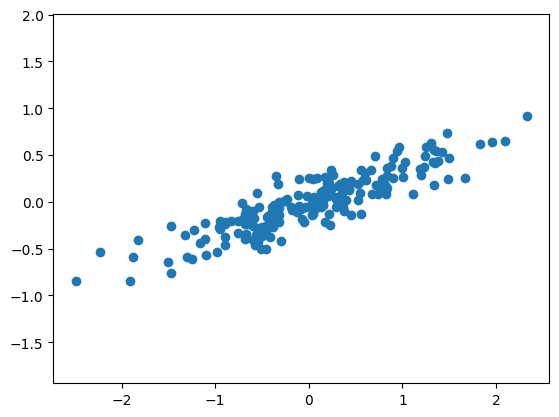

In [4]:
#
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's `PCA` estimator, we can compute this as follows:

In [5]:
#
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the components and explained variance:

In [6]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the components to define the direction of the vector and the explained variance to define the squared length of the vector (see the following figure):

In [8]:
#
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


In [10]:
#
pca.explained_variance_

array([0.7625315, 0.0184779])

In [11]:
#
pca.components_

array([[ 0.94446029,  0.32862557],
       [-0.32862557,  0.94446029]])

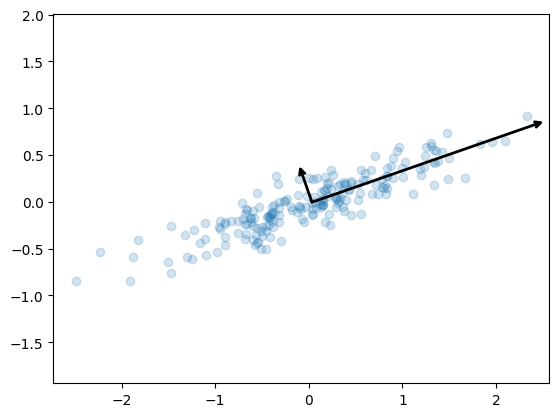

In [15]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

This transformation from data axes to principal axes is an *affine transformation*, which means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### PCA as Dimensionality Reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [16]:
#
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data (see the following figure):

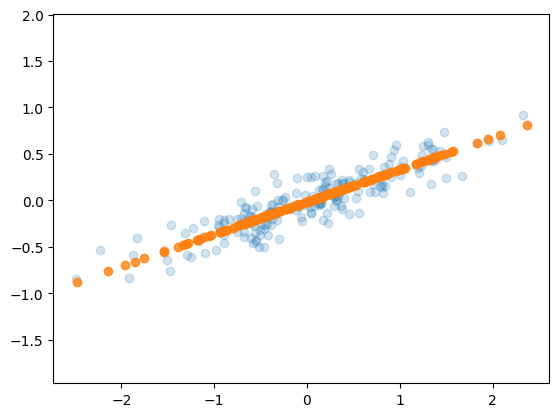

In [18]:
#
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in the preceding figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the number of data features by 50%, the overall relationships between the data points are mostly preserved.

### PCA for Visualization: Handwritten Digits

The usefulness of dimensionality reduction may not be entirely apparent in only two dimensions, but it becomes clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits dataset.

We'll start by loading the data:

In [19]:
#
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

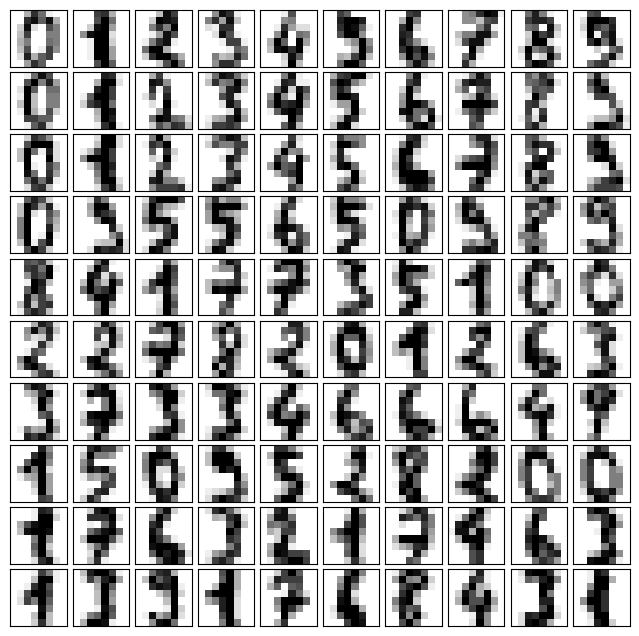

In [21]:
#
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest', clim=(0, 16))#

In [22]:
#
print(digits.data[:5])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

Recall that the digits dataset consists of 8 × 8–pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them into a more manageable number of dimensions, say two:

In [23]:
#
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [24]:
#
projected

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

We can now plot the first two principal components of each point to learn about the data, as seen in the following figure:

/tmp/ipython-input-4161590052.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


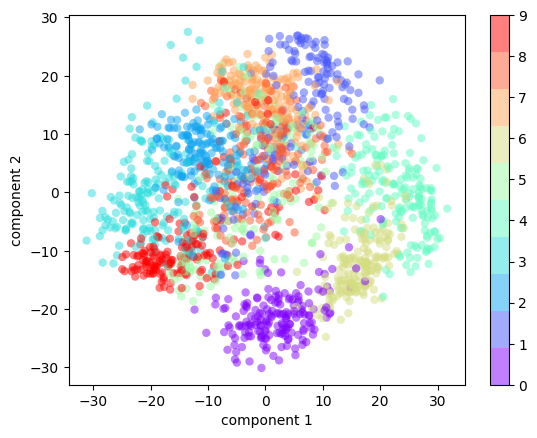

In [25]:
#
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the data in two dimensions, and we have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the Number of Components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components (see the following figure):

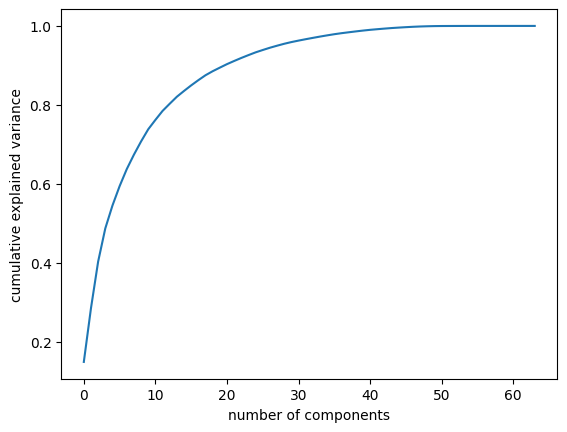

In [26]:
#
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits data the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

This tells us that our 2-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in its features.

In [28]:
import pandas as pd

# Apply PCA with 10 components
pca_10 = PCA(n_components=10)
projected_10 = pca_10.fit_transform(digits.data)

# Create a DataFrame from the projected data
df_pca_10 = pd.DataFrame(projected_10, columns=[f'PC{i+1}' for i in range(10)])


In [29]:
print("Original data shape:", digits.data.shape)
print("Transformed DataFrame shape:", df_pca_10.shape)
display(df_pca_10.head())

Original data shape: (1797, 64)
Transformed DataFrame shape: (1797, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.259466,-21.274883,9.463055,-13.014189,7.128823,7.440659,-3.252837,-2.553470,0.581842,-3.625697
1,7.957611,20.768699,-4.439506,14.893664,-5.896249,6.485622,-2.126228,4.615936,-3.587450,1.074705
2,6.991923,9.955986,-2.958558,12.288302,18.126023,4.507664,-1.843122,16.415200,-0.719233,-4.255805
3,-15.906105,-3.332464,-9.824372,12.275838,-6.965169,-1.089483,1.042085,-10.973556,3.259735,-6.498753
4,23.306867,-4.269061,5.675129,13.851524,0.358124,2.857574,0.720497,-13.041696,3.835413,-13.414164


In [ ]:
# Save the DataFrame to an Excel file
df_pca_10.to_excel('df_pca_10.xlsx', index=False)

print("DataFrame df_pca_10 saved to df_pca_10.xlsx")